In [18]:
options(scipen=999) # Removes scientific notation (useful for when we want readable plots)
options(repr.plot.width=25, repr.plot.height=15) # Make plots larger in Jupyter output
library(dplyr)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggplot2)
library(sf)
library(tmap)
library(tmaptools)
library(ggthemes)
library(plotly)
library(geojsonio)
library(ggthemr)
ggthemr('dust')

ERROR: Error: package or namespace load failed for ‘tmap’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called ‘terra’


In [2]:
depression <- read.csv("https://raw.githubusercontent.com/lostconnectionhere/mental_health/main/data/prevalence-of-depression-males-vs-females.csv")
depression %>% head()

,Entity,Code,Year,Prevalence...Depressive.disorders...Sex..Male...Age..Age.standardized..Percent.,Prevalence...Depressive.disorders...Sex..Female...Age..Age.standardized..Percent.,Population..historical.estimates.,Continent
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Abkhazia,OWID_ABK,2015,NA,NA,NA,Asia
2,Afghanistan,AFG,1990,4.291054,5.859656,12412311,
3,Afghanistan,AFG,1991,4.293268,5.853078,13299016,
4,Afghanistan,AFG,1992,4.298265,5.850020,14485543,
5,Afghanistan,AFG,1993,4.303087,5.844987,15816601,
6,Afghanistan,AFG,1994,4.306053,5.843623,17075728,


In [3]:
names(depression) <- c('Country', 'Code', 'Year', 'Prevalence_depr_male', 'Prevalence_depr_female', 'Population_Estimate', 'Continent')
depression = select(depression, -c('Continent'))
depression = na.omit(depression)
head(depression)

,Country,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_Estimate
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2,Afghanistan,AFG,1990,4.291054,5.859656,12412311
3,Afghanistan,AFG,1991,4.293268,5.853078,13299016
4,Afghanistan,AFG,1992,4.298265,5.850020,14485543
5,Afghanistan,AFG,1993,4.303087,5.844987,15816601
6,Afghanistan,AFG,1994,4.306053,5.843623,17075728
7,Afghanistan,AFG,1995,4.307069,5.843231,18110662


In [4]:
world <- ne_countries(scale = "medium", returnclass = "sf")
class(world)

[1] "sf"         "data.frame"

In [5]:
world = select(world, c(gu_a3, geometry))

In [6]:
names(world) <- c('Code', 'Geometry')
mergedDF = merge(depression, world, by = "Code") %>%
  arrange(Year)

In [7]:
mergeDF_SF <- st_as_sf(mergedDF)
mergeDF_SF <- mergeDF_SF %>% 
  filter(Year == "2019")

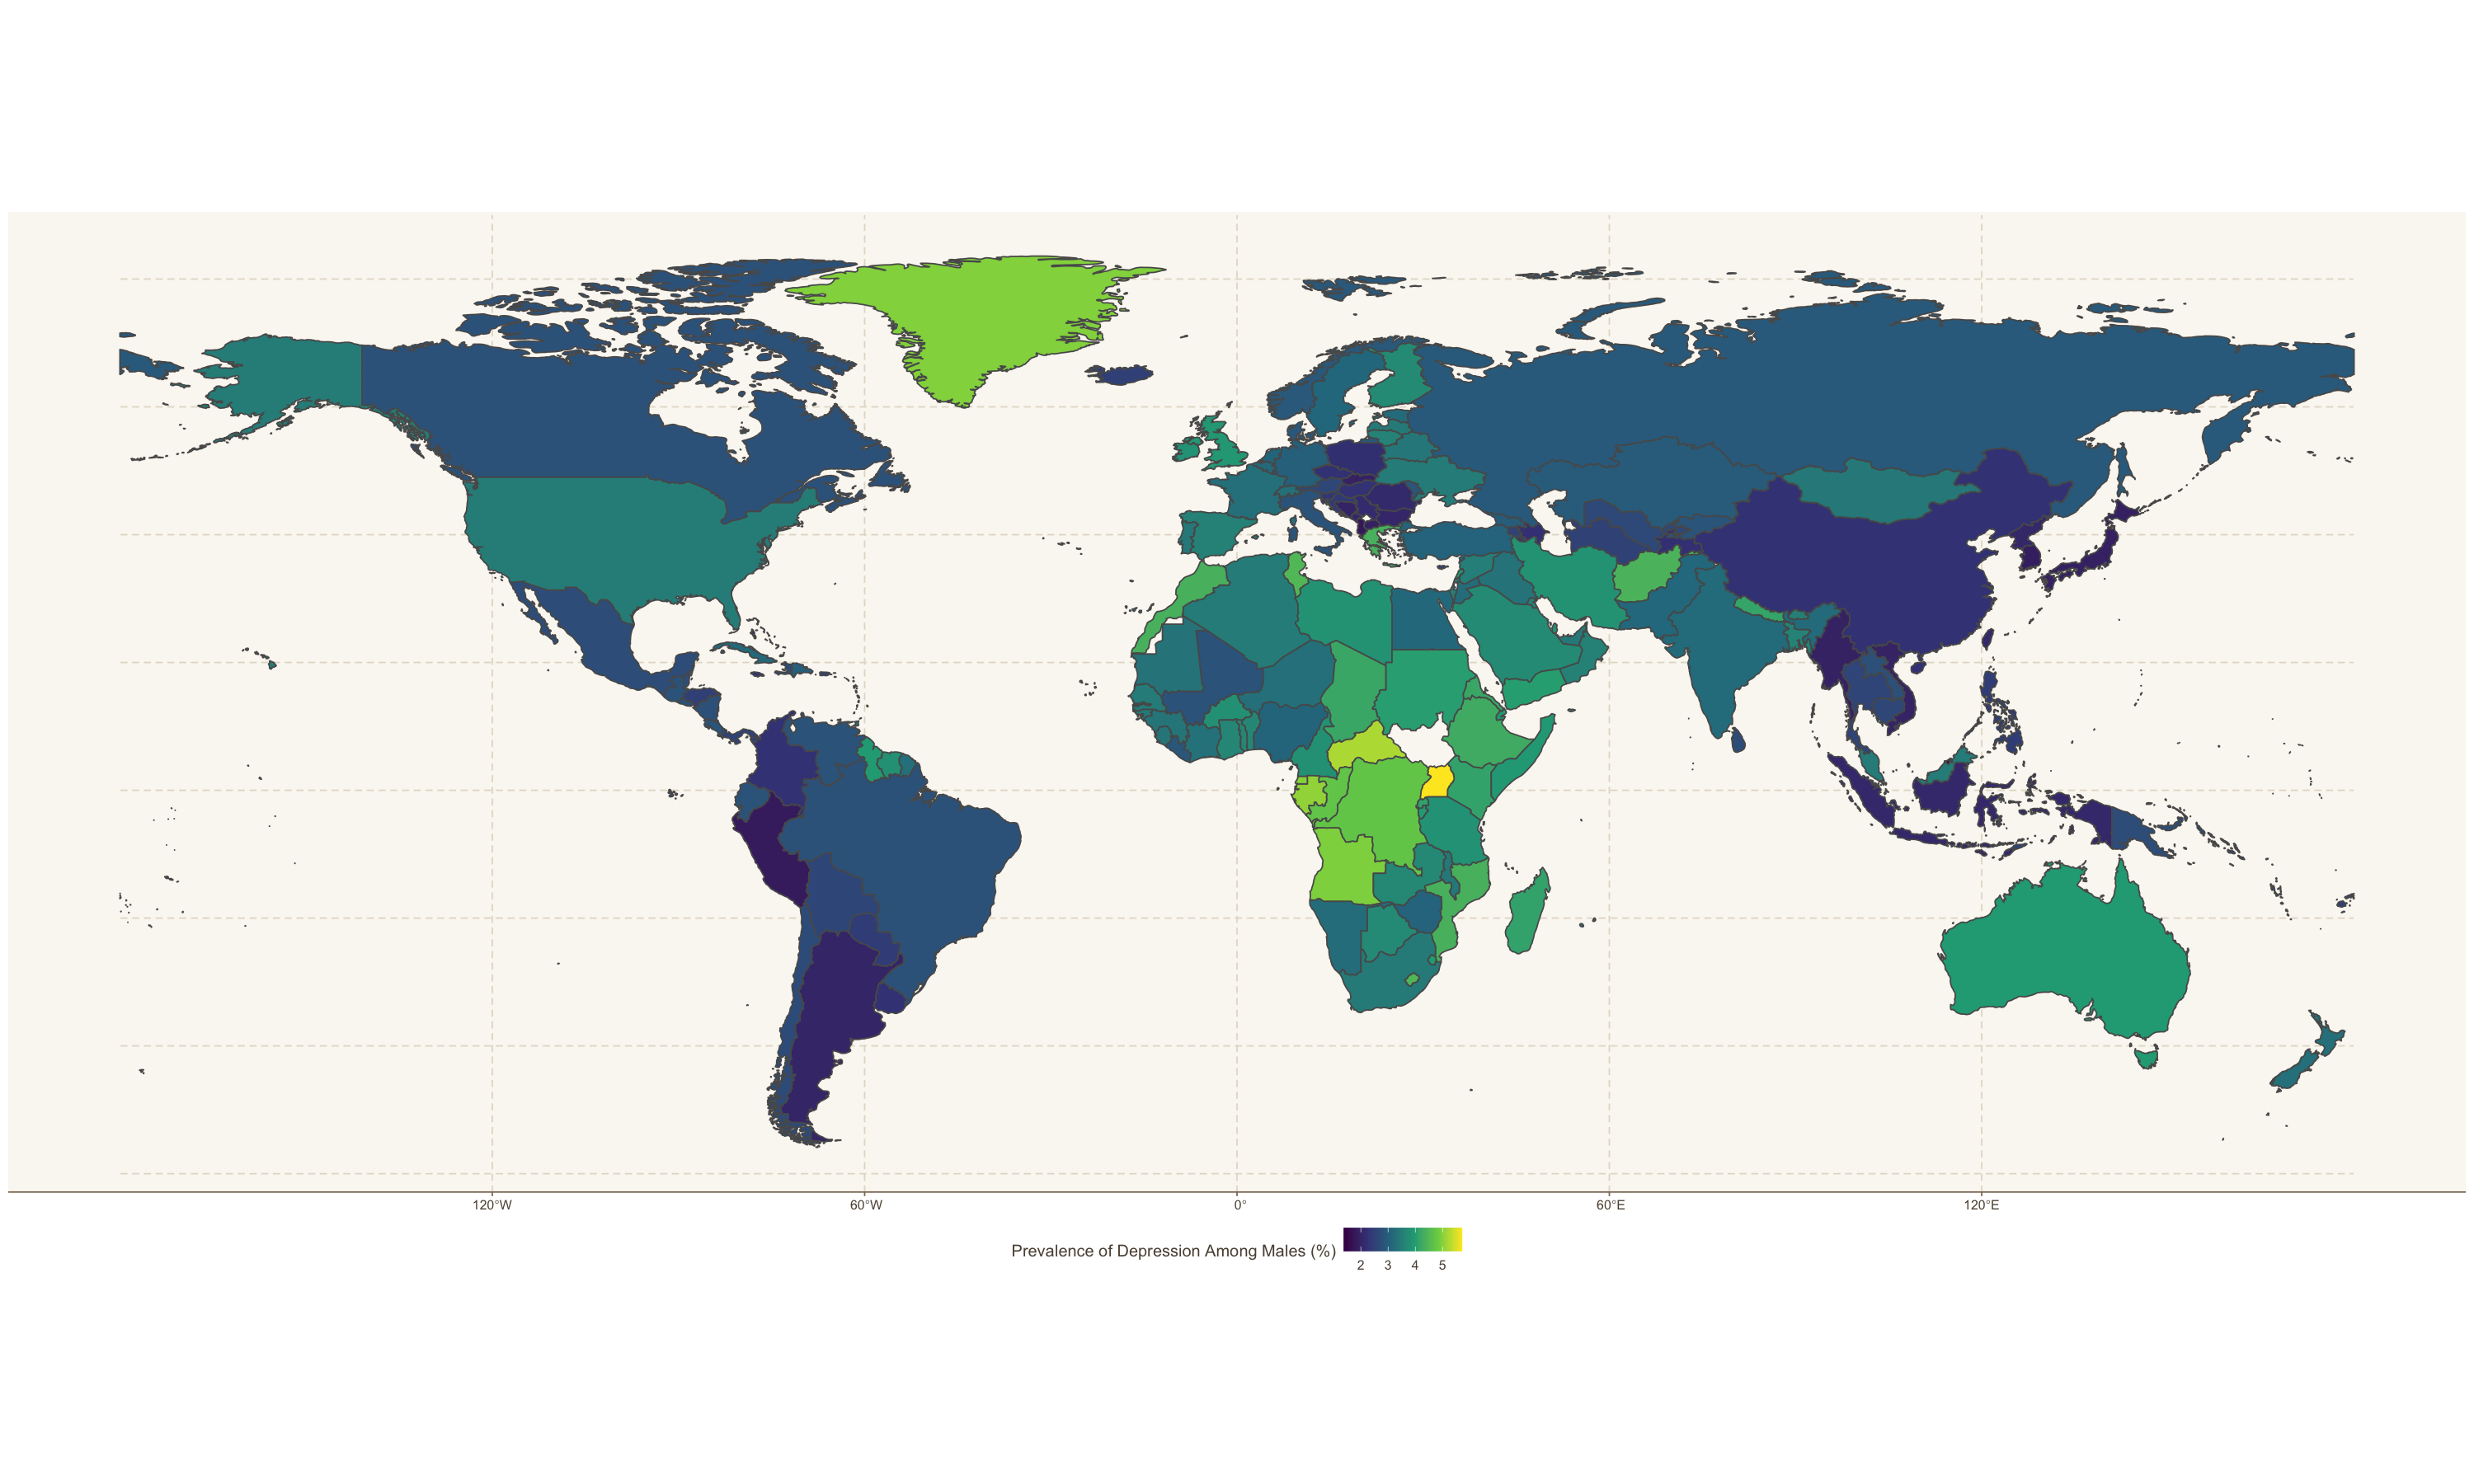

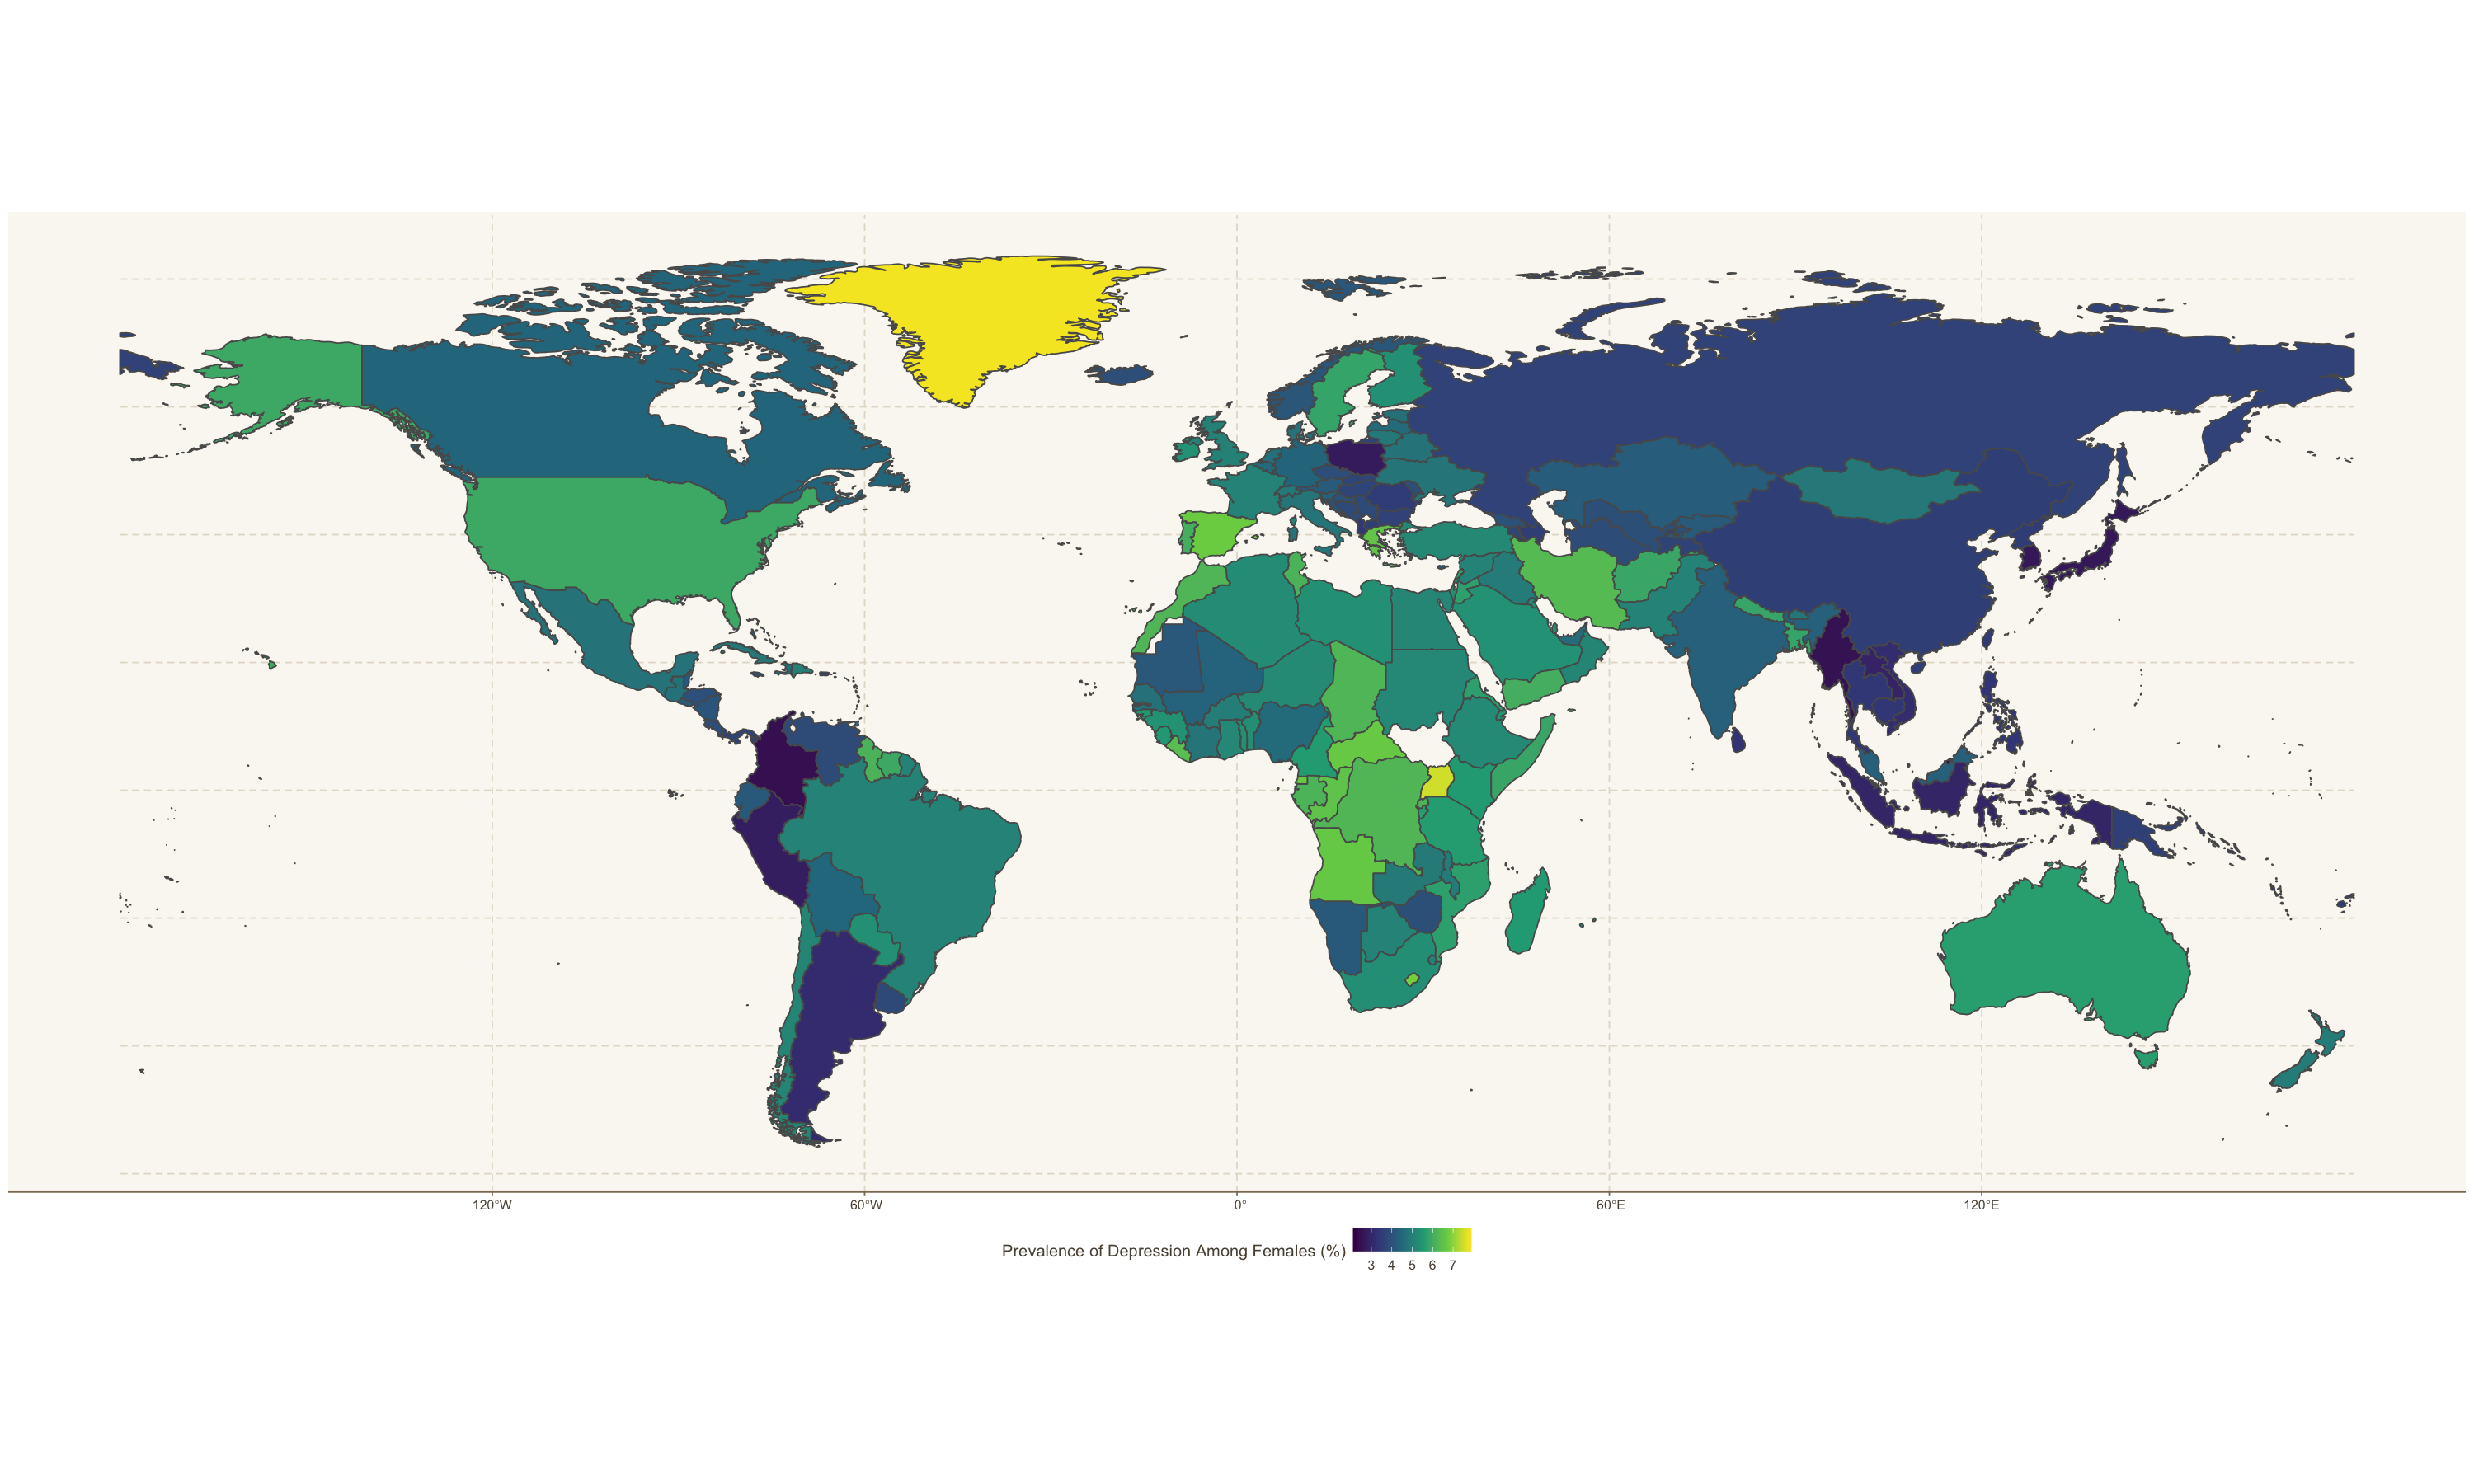

In [19]:
assoc_graph <- ggplot(data = mergeDF_SF) +
  geom_sf(aes(fill = Prevalence_depr_male), 
          position = "identity") + 
  labs(fill='Prevalence of Depression Among Males (%)')  +
  scale_fill_viridis_c(option = "viridis")

assoc_graph + theme(legend.position = "bottom")

assoc_graph <- ggplot(data = mergeDF_SF) +
  geom_sf(aes(fill = Prevalence_depr_female), 
          position = "identity") + 
  labs(fill='Prevalence of Depression Among Females (%)')  +
  scale_fill_viridis_c(option = "viridis")

assoc_graph + theme(legend.position = "bottom")

In [20]:
mergeDF_SF = mergeDF_SF %>% mutate(Dep_Prevalence = (Prevalence_depr_female + Prevalence_depr_male) / 2)
#Creating a single variable averaging prevalence of depression to be used in our modelling

merged_Countries <- mergeDF_SF %>%
  filter(Country == "New Zealand" | Country == "South Korea" | Country == "Netherlands" | Country == "United States")
#Filters to our countries of interest

,Code,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_Estimate,Geometry
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,KOR,South Korea,2019,1.882579,2.645372,51225321,MULTIPOLYGON (((126.327 33....
2,NLD,Netherlands,2019,3.105522,4.641967,17097123,MULTIPOLYGON (((-68.20581 1...
3,NZL,New Zealand,2019,3.271389,4.920959,4783062,MULTIPOLYGON (((169.1782 -5...
4,USA,United States,2019,3.495791,5.924440,329064917,MULTIPOLYGON (((-155.5813 1...


In [21]:
# light grey boundaries
l <- list(color = toRGB("grey"), width = 0.5)

fig_male <- plot_geo(merged_Countries)
fig_male <- fig_male %>% add_trace(
  z = ~Prevalence_depr_male, color = ~Prevalence_depr_male, colors = 'viridis',
  text = ~Country, locations = ~Code, marker = list(line = l)
)
fig_male <- fig_male %>% colorbar(title = 'Male Depression Rate')
fig_male <- fig_male %>% layout(
  title = '2019 Female Depression Rates by Country'
)

fig_male

# light grey boundaries
l <- list(color = toRGB("grey"), width = 0.5)

fig_fmale <- plot_geo(merged_Countries) # plotting interactive plot for depression rates for females with plot_geo
fig_fmale <- fig_fmale %>% add_trace(
  z = ~Prevalence_depr_female, color = ~Prevalence_depr_female, colors = 'viridis',
  text = ~Country, locations = ~Code, marker = list(line = l)
)
fig_fmale <- fig_fmale %>% colorbar(title = 'Female Depression Rate') # adding titles
fig_fmale <- fig_fmale %>% layout(
  title = '2019 Female Depression Rates by Country'
)

fig_fmale

ERROR: Error in toRGB("grey"): could not find function "toRGB"


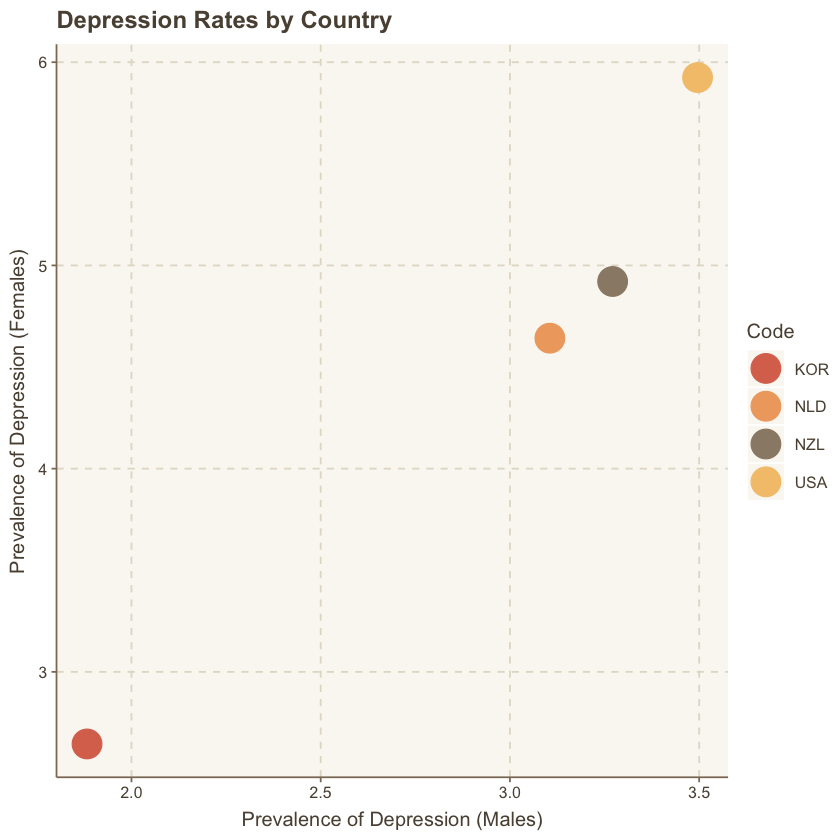

In [17]:
library(ggthemr)
ggthemr('dust')

merged_Countries %>%
  ggplot(aes(x=Prevalence_depr_male, y=Prevalence_depr_female, color=Code, label= Country)) +
  geom_point(size = 8)+
  labs(title = "Depression Rates by Country", x = "Prevalence of Depression (Males)", y = "Prevalence of Depression (Females)")